# Gerar CSV

- Versão feita em **17 setembro de 2023** para rodar no Colab

**Missão:** Este arquivo tem por objetivo a partir de um conjunto de arquivos JSON, gerar um arquivo CSV.

# Manipulação de JSON

## Parâmetros

- Aqui estamos setando a variável "pasta" para o nome do diretório onde se encontrará o nosso dataset, após a extração.

In [ ]:
pasta = 'dataset'
arquivo = 'dataset.rar'

### Ignorando avisos no Pandas

In [ ]:
import warnings
# Ignorar o warning específico
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Importe o arquivo RAR

- A ideia aqui é importarmos a pasta dataset.rar para o colab

- Depois de importar, devemos descompatar, seguindo as células a seguir:

In [ ]:
!pip install rarfile

In [ ]:
import rarfile
import glob
import os

# Abra o arquivo RAR
rar = rarfile.RarFile(arquivo)

# Extraia todos os arquivos para um diretório específico
rar.extractall('')

# Feche o arquivo RAR
rar.close()

* Só para garantir iremos excluir o arquivo modelo.json, caso exista:

In [ ]:
if os.path.exists("dataset/modelo.json"):
    os.remove("dataset/modelo.json")
    print("Arquivo 'modelo.json' excluído com sucesso!")
else:
    print("O arquivo 'modelo.json' não existe na pasta 'dataset'.")

O arquivo 'modelo.json' não existe na pasta 'dataset'.


- Aqui iremos contar a quantidade de arquivos JSON:

In [ ]:
arquivos_json = glob.glob(os.path.join(pasta, '*.json'))

quantidade = len(arquivos_json)
print("Quantidade de arquivos JSON na pasta " + pasta + ":    " + str(quantidade))

Quantidade de arquivos JSON na pasta dataset:    168


## Abrindo um conjunto de JSON em uma pasta

- Bibliotecas:

In [ ]:
import os
import json
import pandas as pd
import codecs

- Setando a pasta

In [ ]:
#Diretório atual
cwd = os. getcwd()
print(cwd)

/content


## Criando o dataframe a partir dos arquivos JSON

In [ ]:
df = pd.DataFrame(columns=['id','titulo', 'autor','url', 'tipo_documento',  'rotulo',  'resumo', 'texto'])

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto


In [ ]:
for nome_arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, nome_arquivo)
    print(caminho_arquivo)
    # Verifique se o arquivo é um arquivo JSON
    if nome_arquivo.endswith('.json') and os.path.isfile(caminho_arquivo):
        dados = json.load(codecs.open(caminho_arquivo, 'r', 'utf-8-sig'))
        df_json = pd.DataFrame([dados])
        df = pd.concat([df, df_json], ignore_index=True)
        # O método append deixará de ser usado em breve
        # df = df.append(dados, ignore_index=True)

dataset/133.json
dataset/152.json
dataset/86.json
dataset/127.json
dataset/108.json
dataset/175.json
dataset/55.json
dataset/82.json
dataset/93.json
dataset/185.json
dataset/62.json
dataset/35.json
dataset/165.json
dataset/47.json
dataset/67.json
dataset/27.json
dataset/124.json
dataset/90.json
dataset/167.json
dataset/180.json
dataset/18.json
dataset/74.json
dataset/94.json
dataset/146.json
dataset/38.json
dataset/53.json
dataset/158.json
dataset/157.json
dataset/143.json
dataset/123.json
dataset/39.json
dataset/24.json
dataset/102.json
dataset/28.json
dataset/169.json
dataset/19.json
dataset/95.json
dataset/184.json
dataset/78.json
dataset/100.json
dataset/130.json
dataset/60.json
dataset/7.json
dataset/48.json
dataset/137.json
dataset/179.json
dataset/22.json
dataset/54.json
dataset/187.json
dataset/155.json
dataset/46.json
dataset/32.json
dataset/119.json
dataset/141.json
dataset/114.json
dataset/132.json
dataset/33.json
dataset/154.json
dataset/134.json
dataset/80.json
dataset/98.

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,133,uma arquitetura para sistemas micropipeline de...,"duarte l. oliveira, kledermon garcia, roberto ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O paradigma assíncrono possui características ...,I. INTRODUÇÃO Sistemas digitais embarcados req...
1,152,identificação de embarcações em imagens de ra...,"gamba, s.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O objetivo deste trabalho é identificar embarc...,"I. INTRODUÇÃO No Brasil, o transporte maríti..."
2,86,simulação da redução dos efeitos da dispersão ...,"Rogerio Barbosa Marques, Joaquim José Barroso ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Os enlaces ópticos possibilitam a transmissão ...,I. INTRODUÇÃO A Força Aérea Brasileira possui...
3,127,tecnologias para comunicações militares: análi...,alessandro roberto dos santos e josé edimar ba...,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Este trabalho enfatiza a necessidade de novas ...,I. INTRODUÇÃO A necessidade de implantação em...
4,108,síntese de contadores síncronos de alta latênc...,"duarte l. oliveira, tiago curtinhas, lester a....",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,A memória da parte sequencial de um sistema di...,I. INTRODUÇÃO A fase corrente da microeletrôn...
...,...,...,...,...,...,...,...,...
163,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
164,31,centro de avaliações do exército finaliza test...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,0,Rio de Janeiro (RJ) – O Centro de Avaliações d...
165,142,planejamento de trajetória de múltiplos robôs ...,"johnathan fercher da rosa, paulo fernando ferr...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,2,Este artigo demonstra uma abordagem para trat...,1. Introdução A robótica vem evoluindo muito ...
166,13,centro de avaliações do exército inicia avalia...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,0,Rio de Janeiro (RJ) – O Centro de Avaliações d...


- Mudando o tipo das colunas **id** e **rotulo** para int

In [ ]:
df['id'] = df['id'].astype(int)
df['rotulo'] = df['rotulo'].astype(int)

## Explorando o dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              168 non-null    int64 
 1   titulo          168 non-null    object
 2   autor           168 non-null    object
 3   url             168 non-null    object
 4   tipo_documento  168 non-null    object
 5   rotulo          168 non-null    int64 
 6   resumo          168 non-null    object
 7   texto           168 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.6+ KB


In [ ]:
quantidade_por_grupo = df.groupby('rotulo').size()
print(quantidade_por_grupo)

rotulo
1    94
2    41
3    33
dtype: int64


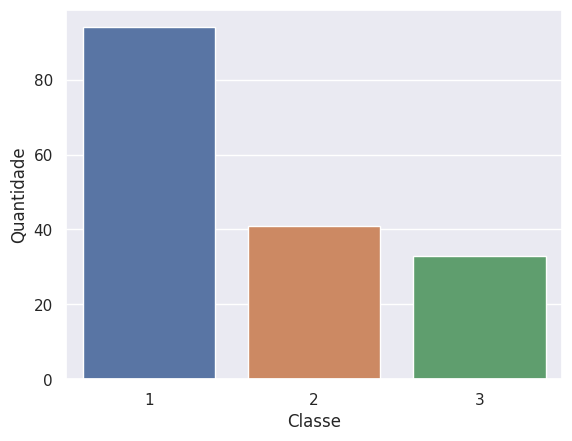

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='rotulo')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Classe")

plt.show()

- Gerando um gráfico de *Pizza*

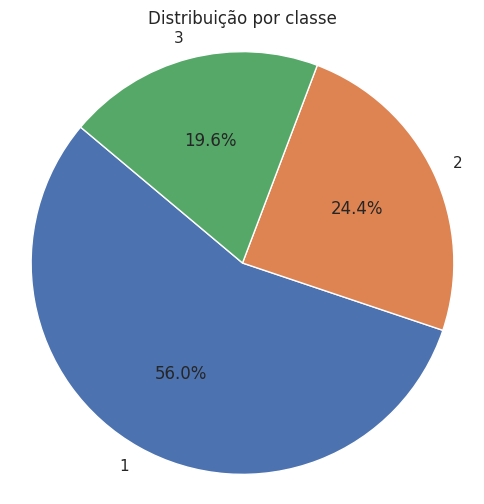

In [ ]:
# Calcular a contagem de cada tipo
contagem_tipos = df['rotulo'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por classe')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

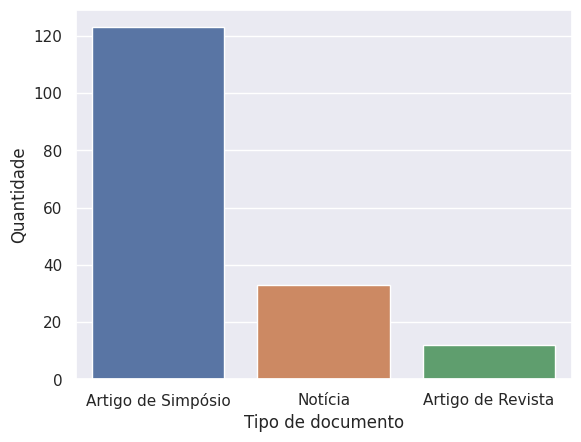

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='tipo_documento')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Tipo de documento")

plt.show()

- Gerando um gráfico de *Pizza*

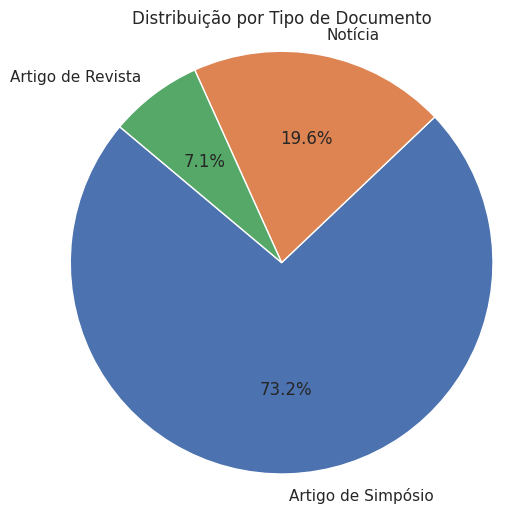

In [ ]:
# Calcular a contagem de cada tipo
contagem_tipos = df['tipo_documento'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Tipo de Documento')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

## Alterando resumo

In [ ]:
df.head(2)

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto,caracteres,palavras
0,133,uma arquitetura para sistemas micropipeline de...,"duarte l. oliveira, kledermon garcia, roberto ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O paradigma assíncrono possui características ...,I. INTRODUÇÃO Sistemas digitais embarcados req...,11583,1746
1,152,identificação de embarcações em imagens de ra...,"gamba, s.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O objetivo deste trabalho é identificar embarc...,"I. INTRODUÇÃO No Brasil, o transporte maríti...",16305,2408


- Para os documentos sem resumo, iremos assumnir que `resumo = texto`

In [ ]:
# Função para contar caracteres e adicionar a nova coluna
def substituir_resumo_por_texto(df):
    for index, row in df.iterrows():
        if row['resumo'] == 0:
            df.at[index, 'resumo'] = row['texto']
    return df

In [ ]:
df = substituir_resumo_por_texto(df)

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto,caracteres,palavras
0,133,uma arquitetura para sistemas micropipeline de...,"duarte l. oliveira, kledermon garcia, roberto ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O paradigma assíncrono possui características ...,I. INTRODUÇÃO Sistemas digitais embarcados req...,11583,1746
1,152,identificação de embarcações em imagens de ra...,"gamba, s.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O objetivo deste trabalho é identificar embarc...,"I. INTRODUÇÃO No Brasil, o transporte maríti...",16305,2408
2,86,simulação da redução dos efeitos da dispersão ...,"Rogerio Barbosa Marques, Joaquim José Barroso ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Os enlaces ópticos possibilitam a transmissão ...,I. INTRODUÇÃO A Força Aérea Brasileira possui...,14004,2298
3,127,tecnologias para comunicações militares: análi...,alessandro roberto dos santos e josé edimar ba...,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Este trabalho enfatiza a necessidade de novas ...,I. INTRODUÇÃO A necessidade de implantação em...,18274,2904
4,108,síntese de contadores síncronos de alta latênc...,"duarte l. oliveira, tiago curtinhas, lester a....",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,A memória da parte sequencial de um sistema di...,I. INTRODUÇÃO A fase corrente da microeletrôn...,15360,2479
...,...,...,...,...,...,...,...,...,...,...
163,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t...",17320,2763
164,31,centro de avaliações do exército finaliza test...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...,2585,414
165,142,planejamento de trajetória de múltiplos robôs ...,"johnathan fercher da rosa, paulo fernando ferr...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,2,Este artigo demonstra uma abordagem para trat...,1. Introdução A robótica vem evoluindo muito ...,25614,4081
166,13,centro de avaliações do exército inicia avalia...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...,1443,231


## Contando palavras

### Quantidade de caracteres

In [ ]:
# Função para contar caracteres e adicionar a nova coluna
def contar_caracteres(texto):
    return len(texto)

In [ ]:
df['caracteres'] = df['texto'].apply(contar_caracteres)

### Quantidade de palavras

In [ ]:
# Função para contar palavras e adicionar a nova coluna
def contar_palavras(texto):
    palavras = texto.split()  # Divide o texto em palavras usando o carcter espaço
    return len(palavras)

In [ ]:
df['palavras'] = df['texto'].apply(contar_palavras)

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto,caracteres,palavras
0,133,uma arquitetura para sistemas micropipeline de...,"duarte l. oliveira, kledermon garcia, roberto ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O paradigma assíncrono possui características ...,I. INTRODUÇÃO Sistemas digitais embarcados req...,11583,1746
1,152,identificação de embarcações em imagens de ra...,"gamba, s.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O objetivo deste trabalho é identificar embarc...,"I. INTRODUÇÃO No Brasil, o transporte maríti...",16305,2408
2,86,simulação da redução dos efeitos da dispersão ...,"Rogerio Barbosa Marques, Joaquim José Barroso ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Os enlaces ópticos possibilitam a transmissão ...,I. INTRODUÇÃO A Força Aérea Brasileira possui...,14004,2298
3,127,tecnologias para comunicações militares: análi...,alessandro roberto dos santos e josé edimar ba...,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Este trabalho enfatiza a necessidade de novas ...,I. INTRODUÇÃO A necessidade de implantação em...,18274,2904
4,108,síntese de contadores síncronos de alta latênc...,"duarte l. oliveira, tiago curtinhas, lester a....",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,A memória da parte sequencial de um sistema di...,I. INTRODUÇÃO A fase corrente da microeletrôn...,15360,2479
...,...,...,...,...,...,...,...,...,...,...
163,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t...",17320,2763
164,31,centro de avaliações do exército finaliza test...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...,2585,414
165,142,planejamento de trajetória de múltiplos robôs ...,"johnathan fercher da rosa, paulo fernando ferr...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,2,Este artigo demonstra uma abordagem para trat...,1. Introdução A robótica vem evoluindo muito ...,25614,4081
166,13,centro de avaliações do exército inicia avalia...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...,1443,231


### Métricas do Texto

- Caracteres:

In [ ]:
media = df['caracteres'].mean()
mediana = df['caracteres'].median()
quartis = df['caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['caracteres'].min()
maximo = df['caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 13798.815476190477
Mediana: 14641.0
Quartil 25%: 9681.0
Quartil 50% (Mediana): 14641.0
Quartil 75%: 18077.25
Mínimo: 1055
Máximo: 42606


- Palavras

In [ ]:
media = df['palavras'].mean()
mediana = df['palavras'].median()
quartis = df['palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['palavras'].min()
maximo = df['palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 2214.0773809523807
Mediana: 2399.0
Quartil 25%: 1537.5
Quartil 50% (Mediana): 2399.0
Quartil 75%: 2970.25
Mínimo: 171
Máximo: 6778


#### Métricas por rótulo

In [ ]:
estatisticas_por_rotulo = df.groupby('tipo_documento')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por tipo ------")
print(estatisticas_por_rotulo)

------ Métricas palavras por tipo ------
                          media  mediana  minimo  maximo
tipo_documento                                          
Artigo de Revista   3938.000000   3976.0    1281    6778
Artigo de Simpósio  2559.951220   2504.0     826    4946
Notícia              298.030303    252.0     171     723


In [ ]:
estatisticas_por_rotulo = df.groupby('tipo_documento')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por tipo ------")
print(estatisticas_por_rotulo)

------ Métricas caracteres por tipo ------
                           media  mediana  minimo  maximo
tipo_documento                                           
Artigo de Revista   24881.333333  25359.0    7692   42606
Artigo de Simpósio  15916.227642  15788.0    5386   31676
Notícia              1876.636364   1632.0    1055    4357


#### Métricas por tipo

In [ ]:
estatisticas_por_rotulo = df.groupby('rotulo')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas palavras por rótulo ------
              media  mediana  minimo  maximo
rotulo                                      
1       2538.074468   2528.0     826    4946
2       2658.365854   2463.0     183    6778
3        739.181818    268.0     171    4135


In [ ]:
estatisticas_por_rotulo = df.groupby('rotulo')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas caracteres por rótulo ------
               media  mediana  minimo  maximo
rotulo                                       
1       15796.191489  15835.5    5386   31676
2       16564.317073  15073.0    1115   42606
3        4673.393939   1685.0    1055   26043


## Métricas do resumo

In [ ]:
df['r_caracteres'] = df['resumo'].apply(contar_caracteres)

In [ ]:
df['r_palavras'] = df['resumo'].apply(contar_palavras)

In [ ]:
media = df['r_caracteres'].mean()
mediana = df['r_caracteres'].median()
quartis = df['r_caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['r_caracteres'].min()
maximo = df['r_caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 1043.2380952380952
Mediana: 911.0
Quartil 25%: 733.75
Quartil 50% (Mediana): 911.0
Quartil 75%: 1131.5
Mínimo: 261
Máximo: 4357


In [ ]:
media = df['r_palavras'].mean()
mediana = df['r_palavras'].median()
quartis = df['r_palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['r_palavras'].min()
maximo = df['r_palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 160.48214285714286
Mediana: 139.0
Quartil 25%: 111.0
Quartil 50% (Mediana): 139.0
Quartil 75%: 173.0
Mínimo: 40
Máximo: 723


## Análise de tokens

In [ ]:
!pip install -qq transformers

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

- BERTIMBAU

In [ ]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
token_lens = []
token_lens2 = []

# Texto e resumo
for txt in df.texto:
  tokens = tokenizer.encode(txt, max_length=9000)
  token_lens.append(len(tokens))

for txt in df.resumo:
  tokens2 = tokenizer.encode(txt, max_length=9000)
  token_lens2.append(len(tokens2))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 9000])
plt.xlabel('Token count')
plt.title("Tokens - Texto")

In [ ]:
sns.distplot(token_lens2)
plt.xlim([0, 800])
plt.xlabel('Token count')
plt.title("Tokens - Resumo")

In [ ]:
df_token = pd.DataFrame(token_lens, columns=["token texto"])
summary = df_token["token texto"].describe()
summary

In [ ]:
df_token2 = pd.DataFrame(token_lens2, columns=["token resumo"])
summary = df_token2["token resumo"].describe()
summary

## Salvando como CSV

In [ ]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset.csv', index=False)